<a href="https://colab.research.google.com/github/ladsong/if697-2020.2-data-science/blob/projeto2/Spotify_year_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de trends do Spotify
O objetivo desse projeto é analisar os datasets do Spotify, [disponível no Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks), para extrair informações como popularidade dos gêneros ao longo dos anos e suas caracteristicas musicais.

Dos datasets fornecidos, iremos utilizar o `data_o.csv` e o `tracks.csv`, cujo já detém os dados que precisamos, como genero, ano, popularidade, [features do spotify](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-audio-features), etc.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Coleta
Nesse primeiro momento iremos carregar o dataset do Kaggle em nosso notebook e analisar os dados enviados, para dá inicio ao pré processamento.

### Kaggle

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle é o caminho onde o arquivo kaggle.json está presente do Google Drive
#Mudar o diretorio
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 97% 190M/195M [00:02<00:00, 94.6MB/s]
100% 195M/195M [00:02<00:00, 84.1MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  spotify-dataset-19212020-160k-tracks.zip
replace artists.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: artists.csv             
  inflating: data_by_artist_o.csv    
  inflating: data_by_genres_o.csv    
  inflating: data_by_year_o.csv      
  inflating: data_o.csv              
  inflating: dict_artists.json       
  inflating: tracks.csv              


### Carregando o dataset

In [7]:
df_data = pd.read_csv('data_o.csv')
df_tracks = pd.read_csv('tracks.csv')
df_data_by_genres = pd.read_csv('data_by_genres_o.csv')
df_data_by_artist = pd.read_csv('data_by_artist_o.csv')
df_data_by_year = pd.read_csv('data_by_year_o.csv')

In [8]:
print(f"DF - df_data:")
display(df_data.head())


DF - df_data:


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [9]:
print(f"# DF - df_tracks:")
display(df_tracks.head())

# DF - df_tracks:


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [10]:
print(f"# DF - df_data_by_artist:")
display(df_data_by_artist.head())

# DF - df_data_by_artist:


,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [11]:
print(f"# DF - df_data_by_year:")
display(df_data_by_year.head())

# DF - df_data_by_year:


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [12]:
print(f"# DF - df_data_by_genre:")
display(df_data_by_genres.head())

# DF - df_data_by_genre:


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


# 2. Pré Processamento
É importante explicar um pouco sobre algumas colunas presentes no dataset, como tempo e duration_ms.

* Tempo: Batidas da música por minuto
* Duration_ms: Duração da música ou do áudio, então não faz sentido ter durações igual a zero. Então iremos retirar, caso exista
* Mode: é uma coluna considerada dummy e não acrescenta muito, sendo assim será retirada

In [13]:
df_data.loc[df_data['tempo'] == 0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
508,0.0,1924,0.99600,['Ignacio Corsini'],0.0,133947,0.025800,0,2WTtJDfCUjAyCZHRSfCLDn,0.76800,5,0.0831,-24.894,1,La Mina del Ford - Remasterizado,0,1924-03-29,0.0,0.0
591,0.0,1924,0.99600,['Francisco Canaro'],0.0,170253,0.315000,0,5tQsQaMquCXBREb1FNymi7,0.95600,8,0.3750,-15.969,0,Oh Mujer Mujer - Remasterizado,0,1924-07-12,0.0,0.0
2578,0.0,1934,0.00244,['The Moors'],0.0,14629,0.801000,0,29IVdlO7CSlcoOIpOsamkO,0.00125,4,0.0503,-0.671,0,Santa Claus Is Coming To Town,0,1934,0.0,0.0
2764,0.0,1935,0.93600,['Orquesta Francisco Canaro'],0.0,211880,0.202000,0,1QXbWUSsLWPtHrbZ7H8o9i,0.01370,6,0.1200,-12.399,1,Tu Y Yo,4,1935-01-01,0.0,0.0
3042,0.0,1937,0.89000,['Billie Holiday'],0.0,159600,0.281000,0,09eDRV4nzC3eVX7tDEJUNb,0.00000,10,0.2470,-13.078,1,Back In Your Own Backyard - Take 1,17,1937,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169591,0.0,2015,0.46900,['$uicideBoy$'],0.0,153809,0.630000,1,00CutyaH2ljgLtM0nM5LLd,0.37500,2,0.1270,-6.707,1,Clouds As Witnesses,52,2015-03-03,0.0,0.0
169717,0.0,2016,0.12700,"['Rain Sounds', 'Rain Sounds & White Noise', '...",0.0,93452,0.000062,0,6HMSnRW8Htfd3YxdNgUF73,0.99900,9,0.7180,-18.685,1,Pouring Rain,54,2016-03-01,0.0,0.0
169935,0.0,2017,0.42000,['Granular'],0.0,180656,0.001720,0,03sJaTenPLeRaVUISW6pI5,0.39900,4,0.1100,-27.848,0,Pink Noise - BP 240 hz,61,2017-11-24,0.0,0.0
169968,0.0,2017,0.96200,['Fabricants'],0.0,175680,0.000020,0,4UYLGTJRGCt4KzP9r9Y9bH,0.02800,11,0.1370,-52.220,0,Brain Relaxation,57,2017-01-18,0.0,0.0


In [14]:
df_data.loc[df_data['duration_ms'] == 0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo


In [15]:
df_data.loc[df_data['year'] == 0]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo



O dataset df_data, possuem em torno de `170653 rows` e as linhas com o `tempo == 0`, são apenas 143. Assim, não iremos retirar essas linhas dado que são poucas. Enquanto isso, não temos nenhuma linha com `duration_ms == 0` ou `year == 0`

Retirada de colunas consideradas dummy no dataset, visto que não iremos utiliza-las

## Adicionando dataset de gênero
Dado que o dataset `df_data` não possue os gêneros das músicas e o nosso objetivo é analisar a popularidade dos generos com o passar dos anos, iremos adicionar o dataset `data_by_artists`. 
Para isso iremos limpar os dados de artista e genero, utilizando apenas o primeiro artista e o primeiro genero da lista, visto que esses atributos eram objetos.


In [16]:
df_data['first_artist'] = df_data.artists.map(lambda x: x.split(",")[0][1:].replace('[','').replace(']','').replace("'",''))
df_data_by_artist['first_genre'] = df_data_by_artist.genres.map(lambda x: x.split(",")[0][1:].replace('[','').replace(']','').replace("'",''))

In [17]:
df = pd.merge(df_data, df_data_by_artist[['artists','first_genre']], left_on='first_artist', right_on='artists', how='inner', suffixes=('_data','_by_artist'))
df.head()

,valence,year,acousticness,artists_data,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,first_artist,artists_by_artist,first_genre
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.2110,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,Sergei Rachmaninoff,Sergei Rachmaninoff,classical
1,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.0880,0,02GDntOXexBFUvSgaXLPkd,0.527,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867,Sergei Rachmaninoff,Sergei Rachmaninoff,classical
2,0.2820,1921,0.989,"['Sergei Rachmaninoff', 'Ruth Laredo']",0.384,221013,0.1710,0,0NFeJgmTAV1kDfzSQNK41Z,0.820,7,0.116,-20.476,0,"10 Préludes, Op. 23: No. 5 in G Minor. Alla ma...",4,1921,0.0319,107.698,Sergei Rachmaninoff,Sergei Rachmaninoff,classical
3,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.0880,0,0eQsdik7GTEy7M3UytCbSN,0.527,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",0,1921,0.0456,92.867,Sergei Rachmaninoff,Sergei Rachmaninoff,classical
4,0.0770,1921,0.994,"['Sergei Rachmaninoff', 'Ruth Laredo']",0.248,117467,0.0876,0,1Pb4ebTZ4t8erRbLPPb8Pk,0.907,5,0.165,-25.786,1,"6 Songs, Op. 38: No. 3, Daisies (Version for P...",1,1921,0.0566,82.025,Sergei Rachmaninoff,Sergei Rachmaninoff,classical


## Análise de correlações


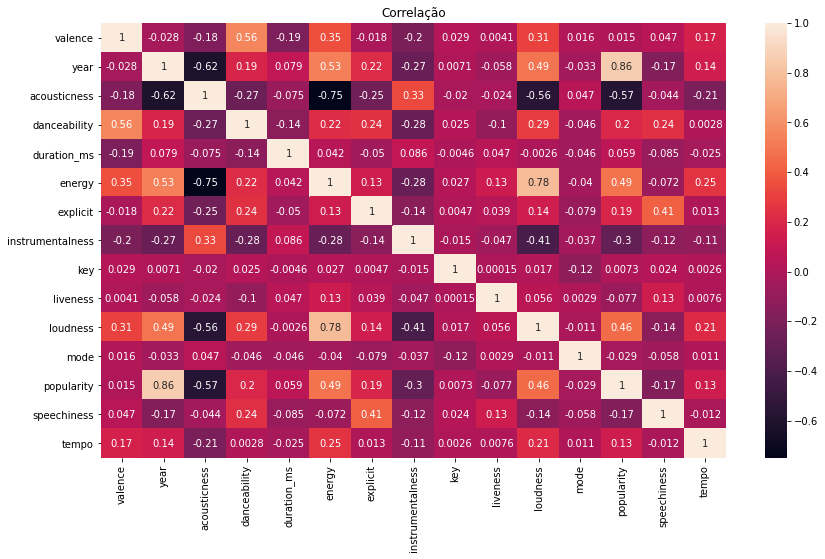

In [18]:
corr = df.corr(method='pearson')
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot= True)
plt.title('Correlação')
plt.show()

Podemos observar alguns campos com correção muito baixa com o campo popularidade, como valence, explicit, key, liveness, loudness, mode. Com isso, vamos retirar essas colunas

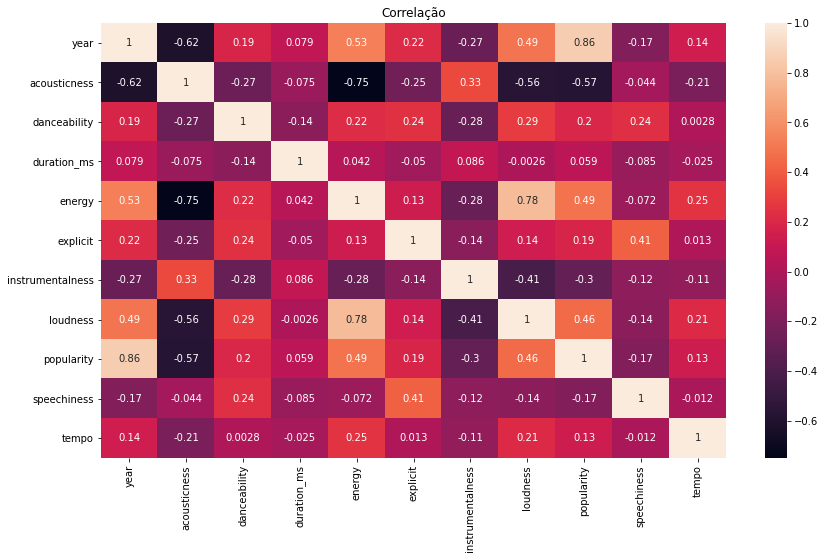

In [19]:
df.drop(['valence', 'key', 'liveness', 'mode'], axis = 1, inplace=True)

#### Nova correlação ####
corr = df.corr(method='pearson')
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot= True)
plt.title('Correlação')
plt.show()

## Normalização dos dados

In [20]:
df["popularity"] = (df["popularity"] - df["popularity"].min()) / (df["popularity"].max() - df["popularity"].min())

In [21]:
df["danceability"] = (df["danceability"] - df["danceability"].min()) / (df["danceability"].max() - df["danceability"].min())

In [22]:
df["energy"] = (df["energy"] - df["energy"].min()) / (df["energy"].max() - df["energy"].min())

# 3. Estatísticas e visualizações dos dados
Inicialmente, observamos a relação de dançabilidade e energia com popularidade, visto que possuem uma alta correlação.

In [23]:
year_avg= df.groupby('year').mean()
year_avg.head(6)
year_avg.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,loudness,popularity,speechiness,tempo
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.556329,0.542957,227323.894808,0.452699,0.078418,0.193654,-11.969892,0.273745,0.105949,116.009940
std,0.275455,0.053141,25586.999693,0.161998,0.113437,0.122592,3.116161,0.207107,0.082393,5.698193
min,0.220221,0.419091,156881.657475,0.206506,0.000000,0.016408,-19.275282,0.001408,0.049177,100.884521
25%,0.289669,0.506469,210850.363799,0.280652,0.000000,0.104027,-14.219085,0.032923,0.064139,111.633059
50%,0.460413,0.546624,234846.987599,0.495276,0.014135,0.128686,-11.750070,0.336078,0.085481,117.497672
75%,0.856814,0.578507,247275.107056,0.596982,0.139143,0.275247,-9.946898,0.449503,0.104513,120.597594
max,0.962410,0.701510,267839.484602,0.681382,0.495064,0.583888,-6.596993,0.652687,0.490479,124.298954


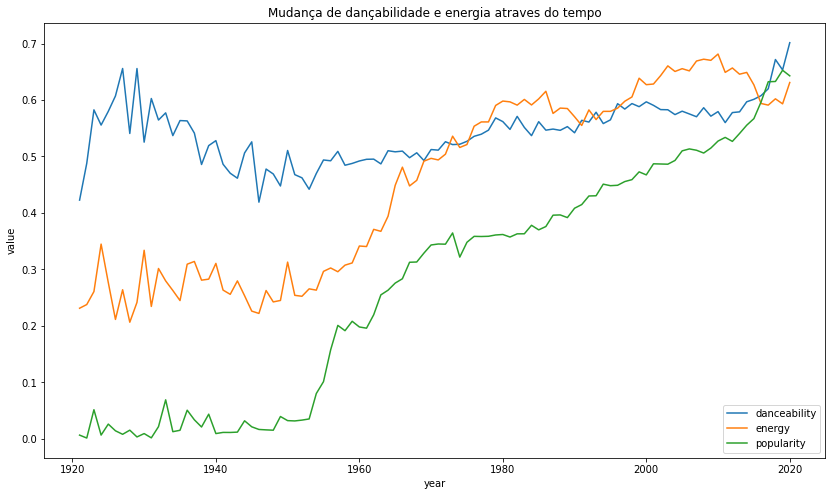

In [24]:
plt.figure(figsize=(14,8))
plt.title('Mudança de dançabilidade e energia atraves do tempo')

_pop = ['danceability', 'energy', 'popularity']
for i in _pop:
    ax = sns.lineplot(x='year', y = i , data = year_avg)

plt.ylabel("value")
plt.legend(_pop)

Optamos por escolher os 10 gêneros mais populares, para assim observar suas correlações com a dançabilidade e energia

In [25]:
year_genre_avg= df.sort_values(by='popularity', ascending= False).head(10)
year_genre_avg.head(20)


,year,acousticness,artists_data,danceability,duration_ms,energy,explicit,id,instrumentalness,loudness,name,popularity,release_date,speechiness,tempo,first_artist,artists_by_artist,first_genre
120415,2020,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.739879,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,-10.059,Dakiti,1.00,2020-10-30,0.0544,109.928,Bad Bunny,Bad Bunny,latin
122444,2020,0.22100,"['24kGoldn', 'iann dior']",0.708502,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,-3.558,Mood (feat. iann dior),0.99,2020-07-24,0.0369,90.989,24kGoldn,24kGoldn,cali rap
122655,2020,0.01120,['BTS'],0.755061,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,-4.410,Dynamite,0.97,2020-08-28,0.0993,114.044,BTS,BTS,k-pop
122870,2020,0.65000,['Pop Smoke'],0.717611,160000,0.548,1,1tkg4EHVoqnhR6iFEXb60y,0.000002,-8.493,What You Know Bout Love,0.96,2020-07-03,0.3530,83.995,Pop Smoke,Pop Smoke,brooklyn drill
117297,2020,0.46800,['Ariana Grande'],0.745951,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,-4.771,positions,0.96,2020-10-30,0.0878,144.015,Ariana Grande,Ariana Grande,pop
121748,2020,0.01940,"['Cardi B', 'Megan Thee Stallion']",0.946356,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,-7.509,WAP (feat. Megan Thee Stallion),0.96,2020-08-07,0.3750,133.073,Cardi B,Cardi B,pop
116423,2020,0.00146,['The Weeknd'],0.520243,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,-5.934,Blinding Lights,0.96,2020-03-20,0.0598,171.005,The Weeknd,The Weeknd,canadian contemporary r&b
121270,2020,0.78600,['Tate McRae'],0.649798,169266,0.374,0,45bE4HXI0AwGZXfZtMp8JR,0.000000,-9.386,you broke me first,0.95,2020-04-17,0.0545,124.099,Tate McRae,Tate McRae,pop
122869,2020,0.11400,"['Pop Smoke', 'Lil Baby', 'DaBaby']",0.832996,190476,0.586,1,0PvFJmanyNQMseIFrU708S,0.000000,-6.606,For The Night (feat. Lil Baby & DaBaby),0.95,2020-07-03,0.2000,125.971,Pop Smoke,Pop Smoke,brooklyn drill
113679,2020,0.19600,"['Justin Bieber', 'Chance the Rapper']",0.681174,212093,0.704,0,5u1n1kITHCxxp8twBcZxWy,0.000000,-8.056,Holy (feat. Chance The Rapper),0.95,2020-09-18,0.3600,86.919,Justin Bieber,Justin Bieber,canadian pop


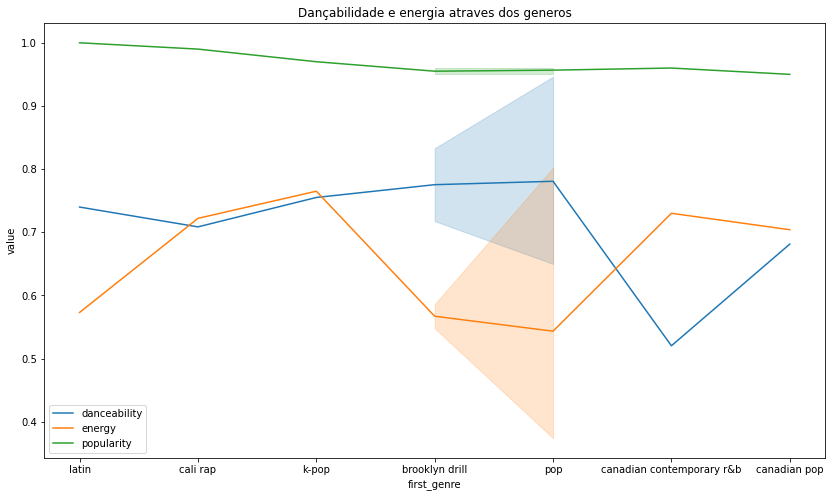

In [26]:
plt.figure(figsize=(14,8))
plt.title('Dançabilidade e energia atraves dos generos')

_pop = ['danceability', 'energy', 'popularity']
for i in _pop:
    ax = sns.lineplot(x='first_genre', y = i , data = year_genre_avg)

plt.ylabel("value")
plt.legend(_pop)

In [28]:
df.to_csv('project1_output.csv', index=False)